In [28]:
import pandas as pd

In [29]:
df=pd.read_csv("C:/A/ViewingActivity-sample.csv")

In [30]:
df

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)
...,...,...,...,...,...,...,...,...,...,...
195,Charlie,2013-03-02 0:45:12,0:05:18,NaN,Star Trek: Deep Space Nine: Season 4: Body Par...,NaN,Mac,0:27:16,Not latest view,US (United States)
196,Charlie,2013-03-01 23:46:16,0:58:12,NaN,Louis C.K.: Live at the Beacon Theater,NaN,Mac,1:01:37,Not latest view,US (United States)
197,Charlie,2013-03-01 23:21:19,0:21:59,NaN,Star Trek: Deep Space Nine: Season 4: Body Par...,NaN,Mac,0:22:01,Not latest view,US (United States)
198,Charlie,2013-03-01 22:36:48,0:44:26,NaN,Star Trek: Deep Space Nine: Season 4: The Quic...,NaN,Mac,0:44:28,0:44:28,US (United States)


In [31]:
df.shape

(200, 10)

In [32]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head()

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 0:20:03,0:48:14,The Invisible War
4,2013-03-20 0:10:31,0:04:51,The Invisible War


In [33]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [34]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [35]:
df = df.set_index('Start Time')
df.index = df.index.tz_convert('Asia/Kolkata')
df = df.reset_index()

In [36]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, Asia/Kolkata]
Duration                   timedelta64[ns]
Title                               object
dtype: object

### Analysis on a Single Series

In [37]:
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]

In [38]:
office

,Start Time,Duration,Title
9,2013-03-19 04:55:36+05:30,0 days 00:00:02,The Office (U.S.): Season 5: The Duel (Episode...
10,2013-03-19 04:34:22+05:30,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...
11,2013-03-19 04:12:50+05:30,0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...
12,2013-03-19 03:51:52+05:30,0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...
13,2013-03-19 03:50:53+05:30,0 days 00:00:55,The Office (U.S.): Season 5: Business Trip (Ep...
...,...,...,...
152,2013-03-09 08:05:43+05:30,0 days 00:00:55,The Office (U.S.): Season 7: Andy's Play (Epis...
153,2013-03-09 06:22:42+05:30,0 days 00:20:44,The Office (U.S.): Season 7: Andy's Play (Epis...
154,2013-03-09 05:59:16+05:30,0 days 00:21:48,The Office (U.S.): Season 7: Counseling (Episo...
155,2013-03-09 05:15:38+05:30,0 days 00:21:48,The Office (U.S.): Season 7: Nepotism (Episode 1)


In [39]:
office = office[(office['Duration'] > '0 days 00:01:00')]

In [40]:
office

,Start Time,Duration,Title
10,2013-03-19 04:34:22+05:30,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...
11,2013-03-19 04:12:50+05:30,0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...
12,2013-03-19 03:51:52+05:30,0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...
14,2013-03-19 01:59:22+05:30,0 days 00:20:15,The Office (U.S.): Season 5: Business Trip (Ep...
15,2013-03-19 01:37:57+05:30,0 days 00:21:21,The Office (U.S.): Season 5: Customer Survey (...
...,...,...,...
151,2013-03-09 08:06:40+05:30,0 days 00:21:43,The Office (U.S.): Season 7: Sex Ed (Episode 4)
153,2013-03-09 06:22:42+05:30,0 days 00:20:44,The Office (U.S.): Season 7: Andy's Play (Epis...
154,2013-03-09 05:59:16+05:30,0 days 00:21:48,The Office (U.S.): Season 7: Counseling (Episo...
155,2013-03-09 05:15:38+05:30,0 days 00:21:48,The Office (U.S.): Season 7: Nepotism (Episode 1)


In [41]:
office['Duration'].sum()

Timedelta('1 days 14:57:28')

In [42]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

<ipython-input-42-942f205b98fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = office['Start Time'].dt.weekday
<ipython-input-42-942f205b98fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['hour'] = office['Start Time'].dt.hour


In [43]:
office

,Start Time,Duration,Title,weekday,hour
10,2013-03-19 04:34:22+05:30,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,1,4
11,2013-03-19 04:12:50+05:30,0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...,1,4
12,2013-03-19 03:51:52+05:30,0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...,1,3
14,2013-03-19 01:59:22+05:30,0 days 00:20:15,The Office (U.S.): Season 5: Business Trip (Ep...,1,1
15,2013-03-19 01:37:57+05:30,0 days 00:21:21,The Office (U.S.): Season 5: Customer Survey (...,1,1
...,...,...,...,...,...
151,2013-03-09 08:06:40+05:30,0 days 00:21:43,The Office (U.S.): Season 7: Sex Ed (Episode 4),5,8
153,2013-03-09 06:22:42+05:30,0 days 00:20:44,The Office (U.S.): Season 7: Andy's Play (Epis...,5,6
154,2013-03-09 05:59:16+05:30,0 days 00:21:48,The Office (U.S.): Season 7: Counseling (Episo...,5,5
155,2013-03-09 05:15:38+05:30,0 days 00:21:48,The Office (U.S.): Season 7: Nepotism (Episode 1),5,5


In [44]:
import matplotlib

<ipython-input-45-30d9e03bdb11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = pd.Categorical(office['weekday'], categories=[0,1,2,3,4,5,6],ordered=True)


<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

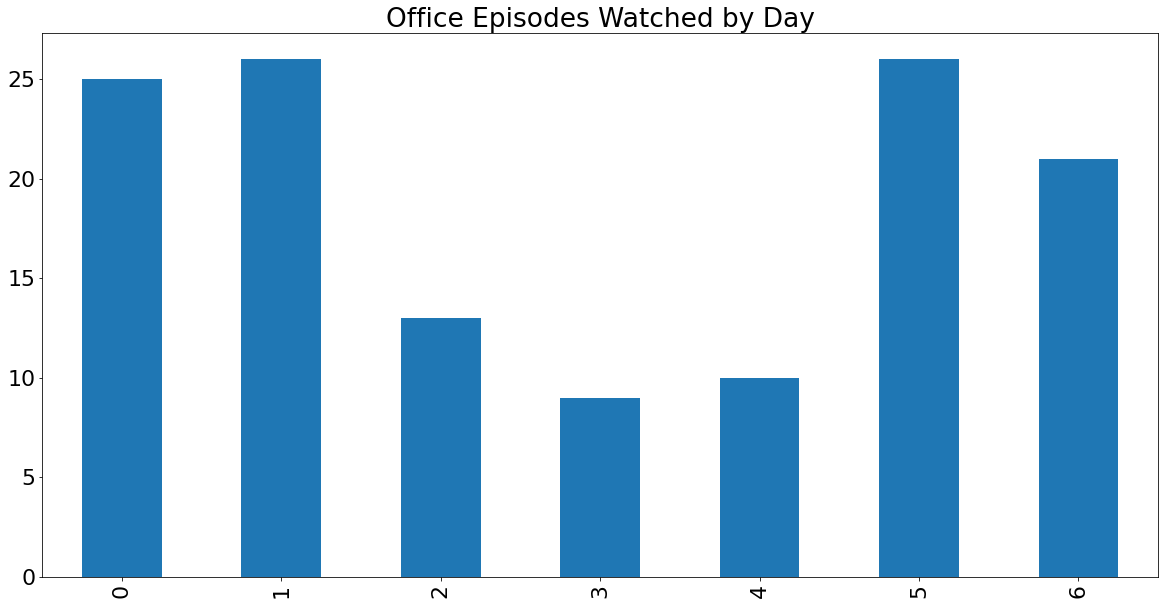

In [45]:
office['weekday'] = pd.Categorical(office['weekday'], categories=[0,1,2,3,4,5,6],ordered=True)
office_by_day = office['weekday'].value_counts()
office_by_day = office_by_day.sort_index()
matplotlib.rcParams.update({'font.size': 22})
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

<ipython-input-46-9f8228941f19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['hour'] = pd.Categorical(office['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)


<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

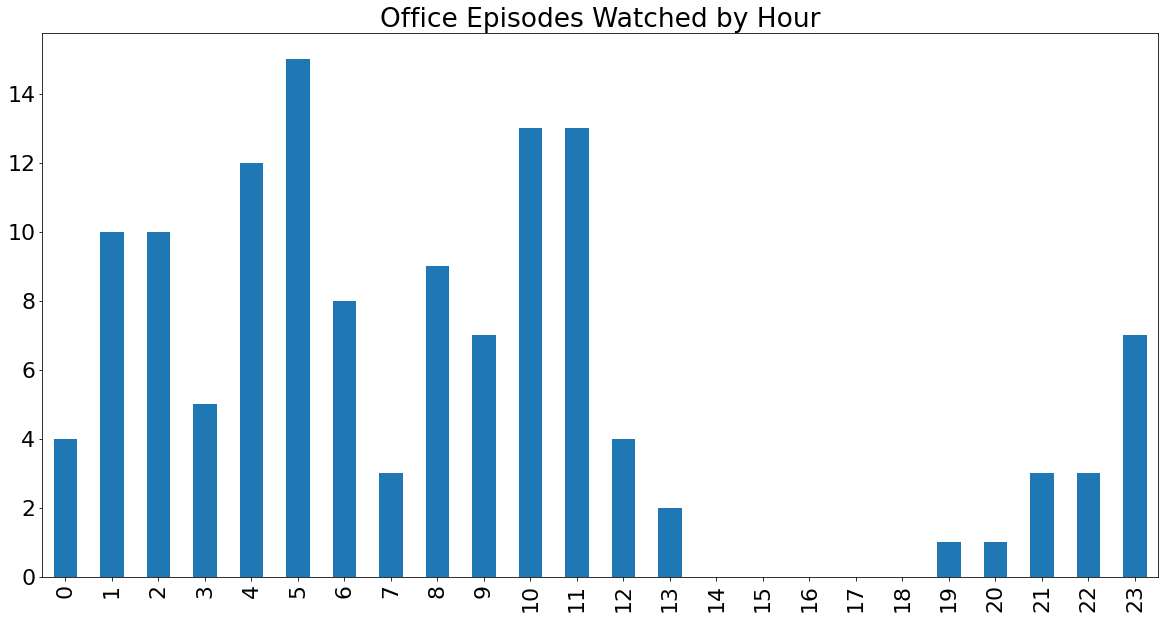

In [46]:
office['hour'] = pd.Categorical(office['hour'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)
office_by_hour = office['hour'].value_counts()
office_by_hour = office_by_hour.sort_index()
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')